# K-means clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
# We can generate the data ourselves.
np.random.seed(3000)

# Draw data for K clusters
K = 4
N = 100

xx, yy = np.array([]), np.array([])

for i in range(K):
    mean_x = np.random.choice(10)
    mean_y = np.random.choice(10)
    mean = [mean_x, mean_y]
    cov = [[1, 0], [0, 1]]  # diagonal covariance

    x, y = np.random.multivariate_normal(mean, cov, N).T
    xx = np.append(xx, x)
    yy = np.append(yy, y)

X = np.concatenate((xx.reshape((-1, 1)), yy.reshape((-1, 1))), axis=1)
print(X.shape)

(400, 2)


Text(0, 0.5, 'y')

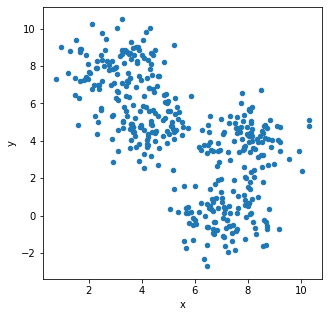

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=20)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [4]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42) # Note, there are no targets
print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


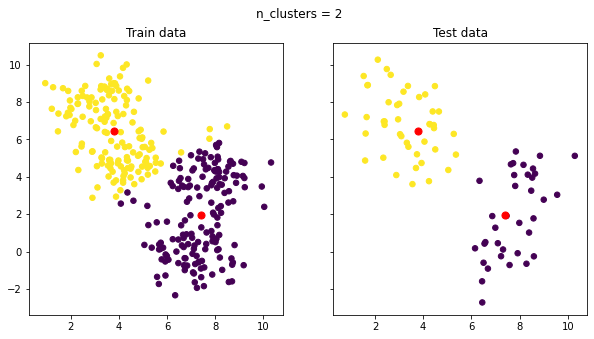

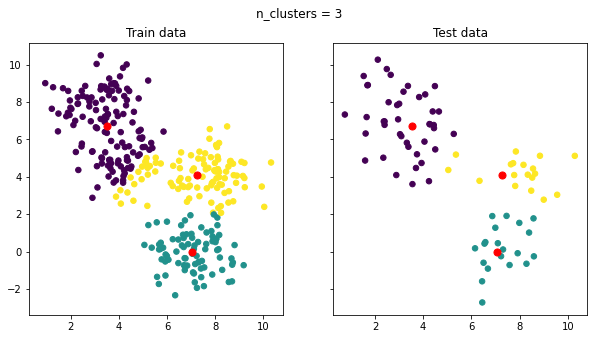

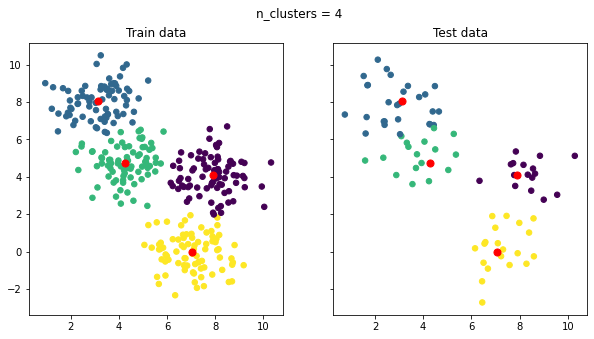

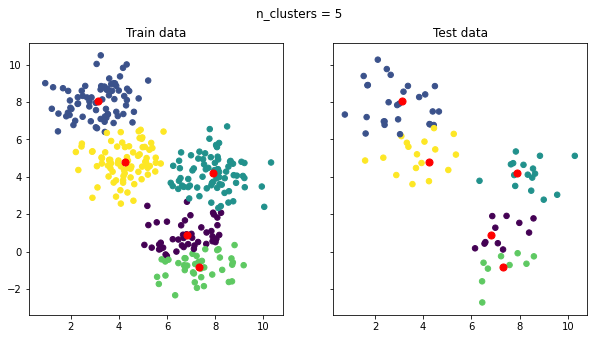

In [5]:
K = [2, 3, 4, 5]
for n_clusters in (K):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)
    centers = kmeans.cluster_centers_
    train_labels = kmeans.labels_

    test_labels = kmeans.predict(X_test)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
    fig.suptitle(f'n_clusters = {n_clusters}')
    axs[0].scatter(X_train[:, 0], X_train[:, 1], s=30, c=train_labels)
    axs[0].scatter(centers[:, 0], centers[:, 1], c="r", s=50)
    axs[0].set_title('Train data')

    axs[1].scatter(X_test[:, 0], X_test[:, 1], s=30, c=test_labels)
    axs[1].scatter(centers[:, 0], centers[:, 1], c="r", s=50)
    axs[1].set_title('Test data')

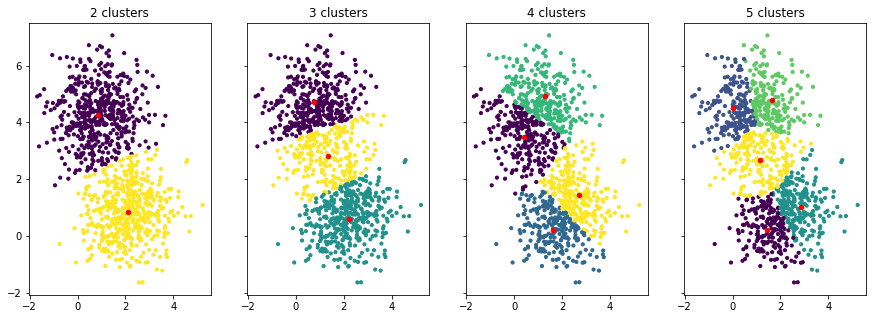

In [6]:
# Similar example, but with using the make_blobs dataset from sklearn
# make_blobs: Generate isotropic Gaussian blobs for clustering.
# isotropic = uniform in all orientations, identical in all directions

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
n_samples = 1000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans
K = [2, 3, 4, 5]

fig, axs = plt.subplots(1, len(K), figsize=(15, 5), sharey=True)

for i, n_clusters in enumerate(K):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_

    axs[i].scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_)
    axs[i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

    axs[i].set_title(f"{n_clusters} clusters")

plt.show()

# Some example(s) where K-Means fails

In [ ]:
# So far, we have seen that K-Means produces clusters of a spherical-shape around the centroids. 

(200, 2)


Text(0, 0.5, 'y')

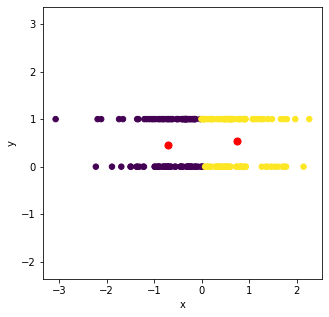

In [7]:
# Create horizontal data
N = 100

X = np.zeros((2 * N, 2))
x, y = np.random.normal(0, 1, N), np.zeros(N)
X[:N, 0], X[:N, 1] = x, y

x, y = np.random.normal(0, 1, N), np.ones(N)
X[N:, 0], X[N:, 1] = x, y

print(X.shape)

kmeans = KMeans(n_clusters=2).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=30, c=labels)
ax.scatter(centers[:, 0], centers[:, 1], c="r", s=50)
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

(200, 2)


Text(0, 0.5, 'y')

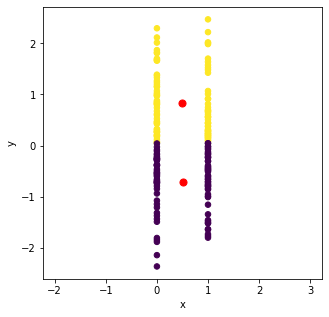

In [8]:
# Create vertical data
N = 100

X = np.zeros((2*N, 2))
x, y = np.zeros(N), np.random.normal(0, 1, N)
X[:N, 0], X[:N, 1] = x, y

x, y = np.ones(N), np.random.normal(0, 1, N)
X[N:, 0], X[N:, 1] = x, y

print(X.shape)

kmeans = KMeans(n_clusters=2).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=30, c=labels)
ax.scatter(centers[:, 0], centers[:, 1], c="r", s=50)
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Demonstration of k-means assumptions


In [13]:
# Question for you: Is the K-Means robust to outliers? (Simpler question: Is mean robust to outliers?)